# Importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [3]:
train_data = pd.read_csv('data_train.csv')

In [5]:
train_data.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


# Visualising Rating Categories


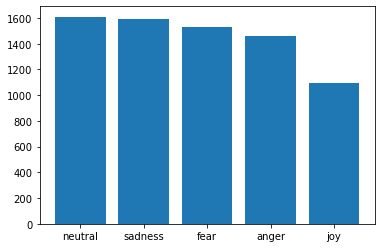

In [8]:
Text_df = train_data.drop_duplicates(keep='first')
plt.bar(Text_df["Emotion"].unique(),Text_df["Emotion"].value_counts())
plt.show()

Text(0.5, 1.0, 'Labels')

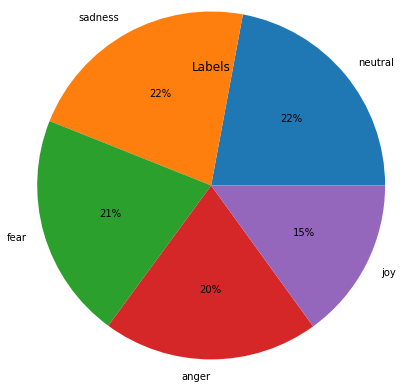

In [10]:
plt.pie(Text_df["Emotion"].value_counts(),autopct='%1.0f%%',radius=2,labels=Text_df["Emotion"].unique())
plt.title("Labels")

# Data Preprocessing

In [11]:
# Importing Required libraried

import re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [12]:
# Removing 'not' from stopwords as not plays a very important role in determining the meaning of the sentence

stop_words = set()
for word in set(stopwords.words('english')):
    if word != 'not':
        stop_words.add(word)

# Corpus Creation

In [13]:
corpus = []
for i in range(0, 7934):
    review = re.sub('[^a-zA-Z]', ' ', train_data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
Y = train_data.iloc[:, 0:1].values

# Using Laber Encoder to handle Dependent variable

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y[:, 0] = labelencoder_Y.fit_transform(Y[:, 0])
Y=Y.astype('int')

# Training the model

In [16]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
# Creating the model and fitting it to the dataset

# Importing Required packages
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB

# Making the classifier with suitable parameters
bg = BaggingClassifier(MultinomialNB(), max_samples = 0.5, max_features = 1.0, n_estimators = 100)

# Fitting the model to the dataset
bg.fit(X_train, Y_train.ravel())

BaggingClassifier(base_estimator=MultinomialNB(), max_samples=0.5,
                  n_estimators=100)

# Checking Accuracy

In [18]:
# Accuracy on training set

print(bg.score(X_train, Y_train))

0.7412951000472664


In [19]:
# Accuracy on test set

print(bg.score(X_test, Y_test))

0.5992438563327032


# Confusion Matrix to analyze pedictions

In [20]:
# Predicting 

Y_pred = bg.predict(X_test)

In [21]:
# creating confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [22]:
cm

array([[201,  24,  26,  17,  48],
       [ 33, 184,  20,  11,  37],
       [ 23,  12, 214,  40,  32],
       [ 22,  33,  54, 138,  90],
       [ 34,  26,  29,  25, 214]], dtype=int64)

# Plotting Cunfusion Matrix for better understanding the models accuracy

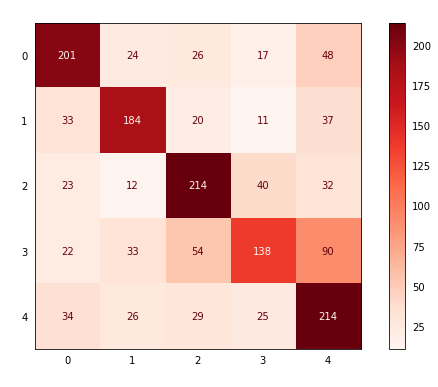

In [24]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(bg, X_test, Y_test, cmap = plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(color = 'white')
plt.gcf().axes[1].tick_params(color = 'white')
plt.gcf().set_size_inches(10,6)
plt.show()

# Dumping Model and Vectorizer using Pickle module

In [26]:
import pickle
pickle.dump(cv,open("emotin_vectorizer.pkl","wb"))
pickle.dump(bg,open("emotion_model.pkl","wb"))

# These pickle files can be used In the Web Application